# OKCupid Date-A-Scientist Portfolio Project

## Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.
The analysis will be split in 2 parts:

1) __Supervised Learning__: using some of the data as features, several ML approaches will be used to predict another feature, used as a target label.

2) __Unsupervised Learning__: the main goal of dating apps is to match people. So I will use an unsupervised ML approach to find clusters of users that could match starting from their own data.


## Step 1: EDA

First task is always to look at the data we have, understand them and rearrange them in order to have the correct input format for a Machine Learning algorithm.

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('profiles.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

From `.info()` method we learn that:

1) We have 59946 rows (i.e: 59946 OKCupid profiles)\
2) We have 31 features, the majority of which is a string (possibly categorical variables)\
3) There are only 3 numerical features: `age`, `height` and `income`\
4) Most of the features have several NaNs (only 7 features have no NaNs)

We can see also that there are 10 `essay` features. Looking on [kaggle](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles/discussion/183145), we understand that those essays are open answers to the follwing questions:

essay0- My self summary\
essay1- What I’m doing with my life\
essay2- I’m really good at\
essay3- The first thing people usually notice about me\
essay4- Favorite books, movies, show, music, and food\
essay5- The six things I could never do without\
essay6- I spend a lot of time thinking about\
essay7- On a typical Friday night I am\
essay8- The most private thing I am willing to admit\
essay9- You should message me if...

Being `essay` columns open text, they could be input to a Naive Bayes Classifier.

It could be helpful to gather all the information from all 10 essays into one big essay, and use it to try to predict some other feature. 

__DA SISTEMARE__ Nevertheless, considering our goal of finding clusters of possible matches using Unsupervised Learning Algorithms, those features could be difficult to handle; thus, for now we are going to exclude them. Let's create a DataFrame `X` dropping all the essay features.

In [297]:
X = df.drop(columns = list(df.filter(regex = 'essay')), axis = 1)

Let's look now each individual feature, in order to understand whether we can give it as input to our Machine Learning Algorithm. We start with a `.describe()` summary:

In [298]:
X.describe(include='all')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54266,59943.000000,59946.000000,51748,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,217,NaN,NaN,21,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,white,NaN,NaN,other,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,32831,NaN,NaN,7589,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numerical Variables

From this summary, we can already see something strange:

1) Max `age` is 110. Even though not impossible, it sounds very odd that a 110-years-old person uses a dating app. Furthermore, being the median of 30-years-old and the 75th percentile of 37-years-old, it will be very hard to match.

2) Min `height` is 1. That's obviously an outlier.

3) It seems that a lot of people has `income` of -1, being this value not only the median, but also the 3rd quartile. That is probably not an outlier nor a mistake, but a way to assess that income is not a crucial feature (or, in case of students, that they don't have any income).

Let's clean those issues starting with age:

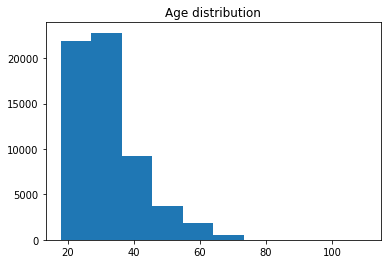

263
2


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,67.0,-1,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,95.0,-1,student,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


In [299]:
plt.hist(X['age'])
plt.title('Age distribution')
plt.show()

print(len(X[X.age>65]))
print(len(X[X.age>70]))
X[X.age>70]

We have 263 profiles with `age`>65, but only 2 with `age`>70, and those two have values of 110 and 109, obviously outliers. Let's remove them.

In [300]:
X = X[X.age < 80]

We exclude also every profile with a `height` lower than 45 inches and higher than 90 inches, which are very much likely outliers as well

In [301]:
X = X[(X.height>=45)&(X.height<90)]

People with income = -1: 48407
People with income > -1: 11483
People with income between 300000 and 900000$: 48
People with income higher than 500000$: 510


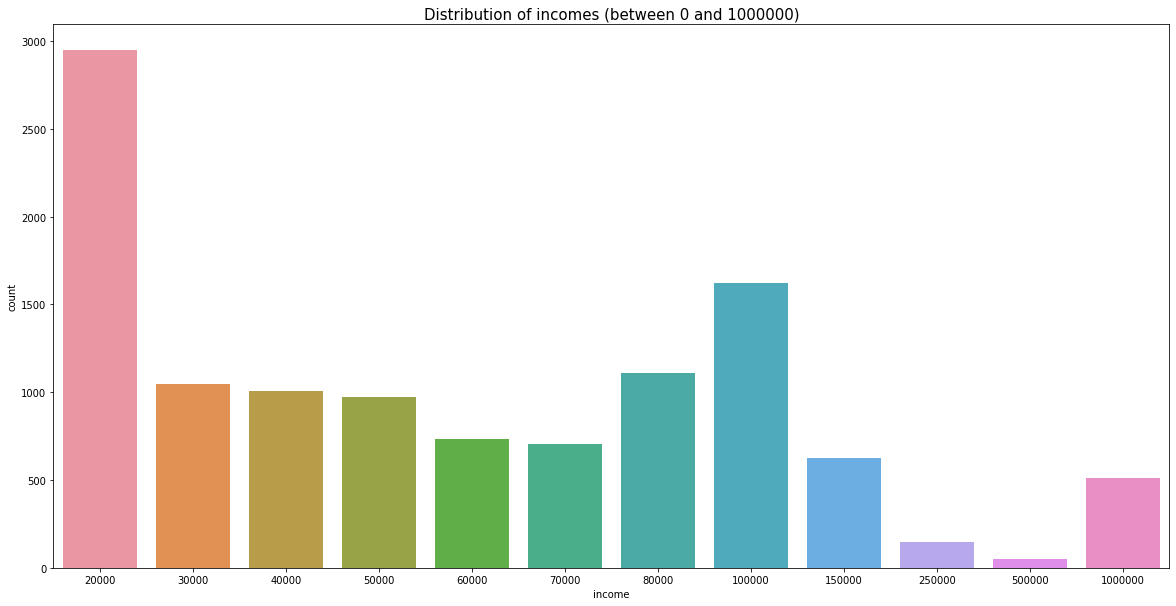

In [302]:
print("People with income = -1: " + str(len(X[X.income==-1])))
print("People with income > -1: " + str(len(X[X.income>0])))
print("People with income between 300000 and 900000$: " + str(len(X[(X.income>=300000)&(X.income<=900000)])))
print("People with income higher than 500000$: " + str(len(X[X.income>500000])))

#plt.hist(X.income)
plt.figure(figsize=(20,10))
sns.countplot(x=X[X.income>0].income)
plt.title("Distribution of incomes (between 0 and 1000000)", fontdict={'fontsize': 15})
plt.show()

We have the highest majority of people (almost 81%) with `income` value of -1, meaning that they do not care about the income.
Furthermore, there are around 500 people declaring an income of 1000000, which seems as well a declaration of not caring.
Anyway, let's keep the values as they are and see whether they can be useful in a Machine Learning Algorithm.

Apart from these values, the distribution of incomes seems bimodal, with the highest peak at 20000 and another local maximum at 100000.

### Categorical variables

Let's now encode the Categorical variables.

1) __BODY TYPE__: unordered Categorical variable, which can be one-hot encoded. NaNs can be replaced with the mode, which is `average`. In order to simplify things, we can group similar description in the following way:

- `thin`, `skinny` and `used up` = `thin`
- `fit`, `athletic`, `full figured` and `jacked` = `fit`
- `curvy`, `a little extra` and `overweight` = `curvy`

In [303]:
body_mode = X['body_type'].mode()
X['body_type'].fillna(body_mode[0],inplace=True)
X['body_type'].replace(to_replace = ['skinny','used up'], value = 'thin', inplace=True)
X['body_type'].replace(to_replace = ['athletic','full figured','jacked'], value = 'fit', inplace=True)
X['body_type'].replace(to_replace = ['a little extra','overweight'], value = 'curvy', inplace=True)
print(X.body_type.value_counts())

fit               25936
average           19929
curvy              6994
thin               6834
rather not say      197
Name: body_type, dtype: int64


2) __DIET__: unordered Categorical variable, which can be one-hot encoded. NaNs can be replaced with the mode, which is `mostly anything`. In order to simplify things, we can group similar description (e.g.: `mostly anything`, `anything` and `strictly anything` can all grouped up in `anything`):

In [304]:
diet_mode = X['diet'].mode()
X['diet'].fillna(diet_mode[0],inplace=True)
X['diet'].replace({'mostly ': '', 'strictly ': ''}, regex=True, inplace=True)
print(X.diet.value_counts())

anything      52230
vegetarian     4984
other          1782
vegan           702
kosher          115
halal            77
Name: diet, dtype: int64


3) **DRINKS**: We have a categorical feature with 6 different values, which can be ordered (and thus mapped) in the following way:

- `0` = `not at all`
- `1` = `rarely`
- `2` = `socially`
- `3` = `often`
- `4` = `very often`
- `5` = `desperately`

`NaN`s can be replaced with the mode, which is `socially`

In [305]:
drinks_mode = X['drinks'].mode()
X['drinks'].fillna(drinks_mode[0],inplace=True)
X['drinks'] = X.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5})

4) **DRUGS**: Like `drinks`, this feature can be ordered and mapped in the following way:

- `0` = `never`
- `1` = `sometimes`
- `2` = `often`

`NaN`s can be replaced with the mode, which is `never`

In [306]:
drugs_mode = X['drugs'].mode()
X['drugs'].fillna(drugs_mode[0],inplace=True)
X['drugs'] = X.drugs.map({'never': 0, 'sometimes': 1, 'often': 2})

5) __EDUCATION__: nordered Categorical feature to be one-hot encoded. In this case, replacing `NaN`s with the mode could be inaccurate, thus `NaN`s will be replaced with `rather not say`. In order to simplify things, we can group similar description (e.g.: `graduated from law school`, `law school` and `working on law school` can all grouped up in `law school`). Also `dropped out` will be grouped together.


In [307]:
X['education'].fillna('rather not say',inplace=True)
X['education'].replace({'graduated from ': '', 'working on ': '', r'^dropped out of .*$': 'dropped out'}, regex=True, inplace=True)
print(X.education.value_counts())

college/university    30454
masters program       10775
rather not say         6615
two-year college       2824
ph.d program           2278
dropped out            2103
high school            1609
law school             1409
space camp             1154
med school              669
Name: education, dtype: int64


6) __ETHNICITY__: unordered Categorical feature. This feature is quite a mess. Looking at the pie chart of the distribution of categories, the main ones are the following:

- `white`
- `black`
- `asian`
- `hispanic/latin`
- `indian`
- `pacific islander`
- `native american`
- `middle eastern`

There are cases (around 3.5%) with multiple options: for instance, we can find '_asian, indian, pacific islander, white_'.
To make order, we rearrange each `ethnicity` entry into one of the main categories listed above, following one simple rule: with multiple option, the least common wins. Thus, this is the hierarchy:

`middle eastern` > `native american` > `pacific islander` > `indian` > `black` > `hispanic/latin` > `asian` > `white`

**Example**: the case '_asian, indian, pacific islander, white_', according to the hierarchy mentioned above, will become `pacific islander`

Number of middle easterns: 943
Number of native americans: 1258
Number of pacific islander: 1465


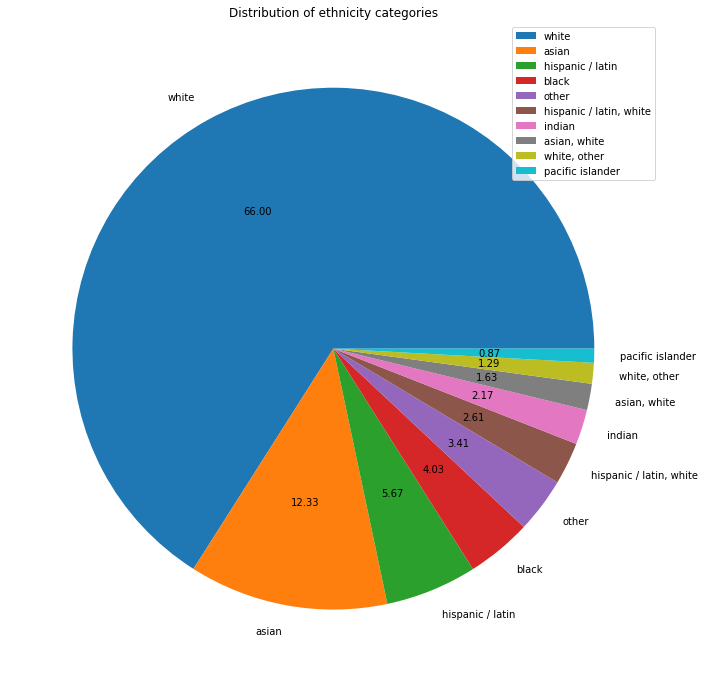

In [308]:
print("Number of middle easterns: " + str(X.ethnicity.str.contains('middle eastern',case=True, regex=True).sum()))
print("Number of native americans: " + str(X.ethnicity.str.contains('native american',case=True, regex=True).sum()))
print("Number of pacific islander: " + str(X.ethnicity.str.contains('pacific islander',case=True, regex=True).sum()))
prova = X.ethnicity.value_counts()
plt.figure(figsize=(20,12))
plt.pie(prova[0:10], labels=prova[0:10].index.values, autopct = '%.2f')
plt.legend(loc='best')
plt.title('Distribution of ethnicity categories')
plt.show()

In [309]:
import re

X.ethnicity.fillna('rather not say',inplace=True)

X.reset_index(drop=True, inplace=True)

for i in range(len(X)):
    if ('middle eastern' in X.at[i, 'ethnicity']):
        X.at[i, 'ethnicity'] = 'middle eastern'
    elif 'native american' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'native american'
    elif 'pacific islander' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'pacific islander'
    elif 'indian' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'indian'
    elif 'black' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'black'
    elif re.search(r'hispanic\s*/\s*latin', X.at[i, 'ethnicity']):
        X.at[i, 'ethnicity'] = 'hispanic'
    elif 'asian' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'asian'
    elif 'white' in X.at[i, 'ethnicity']:
        X.at[i, 'ethnicity'] = 'white'
    else:
        X.at[i, 'ethnicity'] = 'rather not say'

print(X.ethnicity.value_counts())

white               33461
rather not say       7364
asian                7104
hispanic             4521
black                2750
pacific islander     1310
indian               1288
native american      1149
middle eastern        943
Name: ethnicity, dtype: int64


7) __JOB__: unordered Categorical feature to be one-hot encoded. `NaN`s can be replaced with `rather not say`

In [310]:
X['job'].fillna('rather not say',inplace=True)
X.job.value_counts()

rather not say                       8614
other                                7585
student                              4875
science / tech / engineering         4846
computer / hardware / software       4706
artistic / musical / writer          4435
sales / marketing / biz dev          4390
medicine / health                    3679
education / academia                 3510
executive / management               2371
banking / financial / real estate    2265
entertainment / media                2248
law / legal services                 1380
hospitality / travel                 1363
construction / craftsmanship         1021
clerical / administrative             805
political / government                707
transportation                        366
unemployed                            272
retired                               249
military                              203
Name: job, dtype: int64

8) **LAST ONLINE**: This variable is not particularly useful, thus can be dropped

In [311]:
X.drop(columns='last_online',inplace=True)

9) __LOCATION__: Location feature has the structure "city, state". First of all, we split *city* and *state* in two separate columns. Then, we clean a little bit the *city* column (for instance, the value "south san francisco" can be converted in "san francisco", in order to reduce the number of unique values without losing much information)

In [312]:
location_temp = X.location.str.split(pat=',',expand=True)
X['state'] = location_temp[1]
X['state'] = X.state.replace(to_replace=' ', value='', regex=True)
X['city'] = location_temp[0]
X['city'] = X.city.replace(to_replace='^north ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^south ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^east ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^west ',value='',regex=True)
print(X.state.value_counts())

california            59800
newyork                  17
illinois                  8
massachusetts             5
texas                     4
oregon                    4
michigan                  4
arizona                   3
florida                   3
districtofcolumbia        2
washington                2
utah                      2
georgia                   2
minnesota                 2
colorado                  2
unitedkingdom             2
ohio                      2
spain                     2
virginia                  2
hawaii                    2
louisiana                 1
tennessee                 1
switzerland               1
netherlands               1
pennsylvania              1
germany                   1
missouri                  1
britishcolumbia           1
rhodeisland               1
westvirginia              1
connecticut               1
ireland                   1
montana                   1
wisconsin                 1
nevada                    1
newjersey           

Since almost everyone is from California, we keep only people from California (and then this feature can be dropped)

In [313]:
X = X[X.state == 'california']
X.drop(columns=['location','state'],inplace=True)

Give the `city`, we can calculate the distance between each Californian `city` and the mode of the dataframe, which is `san francisco`

In [35]:
from geopy.geocoders import Nominatim
import haversine as hs
import time

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

san_fran = geolocator.geocode("san francisco")
sanfran_coord = (san_fran.latitude, san_fran.longitude)

distance = []
for city in X.city:
    city_temp = geolocator.geocode(city)
    city_coord = (city_temp.latitude, city_temp.longitude)
    bdistance.append(np.round(hs.haversine(sanfran_coord,city_coord),1))
    time.sleep(1)

0


10) **OFFSPRING**: The vast majority of entries of this feature is `NaN`, which can be easily interpreted as `doesn't have kids`, considering the context.

Furthermore, this variable gives us hints about whether people wants kids as well. Nevertheless, it's more difficult to associate this aspect to `NaN`s. We can thus create a new boolean feature `has_kids` (with `NaN`s values = 0) and drop the information about the will of having new kids.

In [314]:
X['offspring'].fillna('doesn\'t have kids',inplace=True)
X['offspring'].replace('&rsquo;','\'',inplace=True, regex=True)
X['has_kids'] = X['offspring'].apply(lambda x: 1 if ('has' in x) else 0)
print(X.offspring.value_counts())
print(X.has_kids.value_counts())
X.drop(columns='offspring',inplace=True)

doesn't have kids                          43011
doesn't have kids, but might want them      3870
doesn't have kids, but wants them           3557
doesn't want kids                           2919
has a kid                                   1879
has kids                                    1879
doesn't have kids, and doesn't want any     1127
has kids, but doesn't want more              441
has a kid, but doesn't want more             274
has a kid, and might want more               231
wants kids                                   225
might want kids                              181
has kids, and might want more                115
has a kid, and wants more                     70
has kids, and wants more                      21
Name: offspring, dtype: int64
0    54890
1     4910
Name: has_kids, dtype: int64


11) __ORIENTATION__: there are 3 values: *straight*, *gay* and *bisex*. Since *bisex* is matchable with both *straight* and *gay*, this variable can be splitted in 2 dummy variables, __*straight_comp*__ and __*gay_comp*__, which are regulated by the following look-up table:


| Orientation | straight_comp | gay_comp |
|-------------|:-------------:|---------:|
| straight    |       1       |    0     |
| gay         |       0       |    1     |
| bisex       |       1       |    1     |

In [315]:
X['straight_comp'] = X['orientation'].apply(lambda x: 1 if (x=='straight')|(x=='bisexual') else 0)
X['gay_comp'] = X['orientation'].apply(lambda x: 1 if (x=='gay')|(x=='bisexual') else 0)
X.drop(columns='orientation',inplace=True)

12) **PETS**: this feature gives us information about people's preferences about dogs and cats. In particular, it tells us if people has or not dogs and/or cats, and/or if they like or dislikes them.
We approach this feature following two hypotesis:

- having a dog/cat means liking them
- no explicits statements about disliking a pet (i.e: `NaN`s, or cases such as `likes dogs` - where no info about cats is provided) means liking that pet.

Based on these hypoteses, we can convert the feature in 2 new features, `likes_dogs` and `likes_cats`:

In [316]:
X['pets'].fillna('likes dogs and likes cats', inplace=True)
X['likes_dogs'] = X['pets'].apply(lambda x: 0 if 'dislikes dogs' in x else 1)
X['likes_cats'] = X['pets'].apply(lambda x: 0 if 'dislikes cats' in x else 1)
print(X.likes_dogs.value_counts())
print(X.likes_cats.value_counts())
X.drop(columns='pets',inplace=True)

1    59243
0      557
Name: likes_dogs, dtype: int64
1    56907
0     2893
Name: likes_cats, dtype: int64


13) **RELIGION**: religion feature has about 20k `NaN`s (which can be converted in the usual `Rather not say`). Apart from that, there are mainly 9 religious options:

- *Agnosticism*
- *Atheism*
- *Catholicism*
- *Christianity*
- *Judaism*
- *Buddhism*
- *Hinduism*
- *Islam*
- *Other*

For each of those options, we can find information about how seriously are they taken into consideration.
We can split those information in 2 features: `religion` will keep only the religion options, while `religion_serious` is a boolean feature indicating whether religion is considered seriously or not.

`NaN` cases will be considered not serious about religion

In [317]:
X['religion'].fillna('rather not say',inplace=True)
X['religion_serious'] = X['religion'].apply(lambda x: 1 if re.search(r'(somewhat|very) serious',x) else 0)
religions = ['agnosticism','atheism','catholicism','christianity','judaism','buddhism','hinduism','islam','other']
for religion in religions:
    X['religion'] = X['religion'].apply(lambda x: religion if religion in x else x)

X['religion'].value_counts()

rather not say    20171
agnosticism        8795
other              7719
atheism            6966
christianity       5779
catholicism        4752
judaism            3089
buddhism           1942
hinduism            449
islam               138
Name: religion, dtype: int64

14) __SEX__: only 2 values, *m* and *f*

In [318]:
sex_dict = {'m':0, 'f':1}
print(X.sex.value_counts())
X['sex'] = X.sex.map(sex_dict)
print(X.sex.value_counts())

m    35732
f    24068
Name: sex, dtype: int64
0    35732
1    24068
Name: sex, dtype: int64


In [319]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

15) **SIGN**: Sign feature can be hanled as `religion`: `NaN`s will become `rather not say`, while other entries can be renamed with the 12 signs available. 

The information about how sign matters can be dropped. **DA VALUTARE SE INVECE MANTENERLA**

In [320]:
X.sign.fillna('rather not say',inplace=True)
signs = ['gemini','scorpio','leo','libra','taurus','cancer','pisces','sagittarius','virgo','aries','aquarius','capricorn']
for sign in signs:
    X['sign']=X['sign'].apply(lambda x: sign if sign in x else x)
    
X.sign.value_counts()

rather not say    11017
leo                4362
gemini             4302
libra              4199
cancer             4198
virgo              4136
taurus             4131
scorpio            4124
aries              3979
pisces             3937
sagittarius        3933
aquarius           3918
capricorn          3564
Name: sign, dtype: int64

16) **SMOKES**: We can make this feature boolean, with 1 if smoker and 0 if not smoker 

In [321]:
X['smokes'] = X.smokes.apply(lambda x: 0 if x=='no' else 1)
X.smokes.value_counts()

0    43804
1    15996
Name: smokes, dtype: int64

17) **SPEAKS**: This feature has 7647 unique values, with a large number of languages (from spanish to c++) associated with their level (poorly, okay or fluently). Nevertheless, since english is common to each entry, and is by far the most popular language, this feature can be dropped.

In [322]:
X['speaks'].fillna('english', inplace=True)
temp = X['speaks'].apply(lambda x: 1 if re.search(r'english \(fluently\).*',x) else 0)
prova = X[temp==1]
print('Number of people speaking fluent english: ' + str(len(prova)))
temp = X['speaks'].apply(lambda x: 1 if re.search(r'english',x) else 0)
prova = X[temp==1]
print('Number of people speaking english: ' + str(len(prova)))

X.drop(columns='speaks',inplace=True)

Number of people speaking fluent english: 28156
Number of people speaking english: 59800


18) **STATUS**: Theoretically in a dating app this feature should have `single` or `available` in every entry. Instead, there is a (small) number of people `seeing someone` and `married`. Anyway, for the purpose of this project, we can drop this feature, since it does not bring useful information 

In [323]:
X.drop(columns='status',inplace=True)

Let's recap what we have done looking at a `describe` of all the features:

In [324]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,59800.0,NaN,NaN,NaN,32.343746,9.445258,18.0,26.0,30.0,37.0,69.0
body_type,59800,5,fit,25892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diet,59800,6,anything,52158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drinks,59800.0,NaN,NaN,NaN,1.909114,0.68865,0.0,2.0,2.0,2.0,5.0
drugs,59800.0,NaN,NaN,NaN,0.142525,0.368364,0.0,0.0,0.0,0.0,2.0
education,59800,10,college/university,30412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,59800,9,white,33405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,59800.0,NaN,NaN,NaN,68.296438,3.866919,47.0,66.0,68.0,71.0,89.0
income,59800.0,NaN,NaN,NaN,19866.415853,96522.337233,-1.0,-1.0,-1.0,-1.0,1000000.0
job,59800,21,rather not say,8599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Solve problems with ML

Here some questions to answer using ML models:

1) Can we predict `sex` from other features?

2) Are there features able to predict `sign`?

3) Are there features able to predict `job`?

4) Can we accurately foresee the `income` using other features?

In [ ]:
from sklearn.model_selection import train_test_split


def ML_pipeline(df):
    #split train and test sets
    X_train,X_test,y_train,y_test = train_test_split(df,test_size=0.33,random_state=42)
    
    #First: Logistic Regression
    

In [325]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [326]:
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


In [333]:
print(one_hot_results[0])

[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [330]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
